Сначала нужно определить какие столбцы мы хотим загрузить из нашей таблицы. 

Так, для моего примера мне нужны столбцы Volume(unit)(2), SurfaceArea (um2)(5) + количество строк.

Шаг1. Извлечение данных из xlsx в df, с которыми я смогу работать в python

glob - показывает пути к файлам с указанным расширением и сохраняет в переменную filepaths

In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

import pandas as pd
import numpy as np
import glob

Функция csv_to_xlsx считывает все файлы csv в папке, затем создает xlsx для каждого файла

In [2]:
def csv_to_xlsx():
    csv_search_string = '**/*.csv'
    csv_filepaths = glob.glob(csv_search_string, recursive=True)
    df = pd.DataFrame()
    for csv in csv_filepaths:
        out = csv.split('.')[0]+'.xlsx'
        df = pd.read_csv(csv, sep=';', decimal = ',', encoding='latin1',engine='python')
        df = df.to_excel(out, float_format="%.4f")
    return (df)
#csv_to_xlsx()

Функция file_extraction:
1. принимает в качестве параметра строку, по которой нужно искать названия файлов 
2. создает список путей к найденным файлам
3. создает пустой датафрейм
4. в цикле считывает файлы, загружает указанные столбцы и присоединяет их к датайрему методом outer.
5. возвращает полученный датафрейм


In [3]:
def file_extraction(search_string): 
    filepaths = glob.glob(search_string) 
    df = pd.DataFrame()
    col_name_suffix = 1
    for find_files in filepaths:
        df = df.join (pd.read_excel(find_files, usecols=[2,5]), how='outer',lsuffix=col_name_suffix,)
        col_name_suffix +=1 
    return(df)

Шаг2. Извлекаем в отдельные датафреймы все имеющиеся данные по каждому животному в контроле и при эпилепсии (N1-N6)

In [4]:
N1_gs_glt_ctrl = file_extraction('**/N1*_ctrl_*.xlsx')
N2_gs_glt_ctrl = file_extraction('**/N2*_ctrl_*.xlsx')
N3_gs_glt_ctrl = file_extraction('**/N3*_ctrl_*.xlsx')
N4_gs_glt_ctrl = file_extraction('**/N4*_ctrl_*.xlsx')
N5_gs_glt_ctrl = file_extraction('**/N5*_ctrl_*.xlsx')
#N6_gs_glt_ctrl = file_extraction('**/N6*.xlsx') 

N1_gs_glt_SE = file_extraction('**/N1*SE*.xlsx')
N2_gs_glt_SE = file_extraction('**/N2*SE*.xlsx')
N3_gs_glt_SE = file_extraction('**/N3*SE*.xlsx')
N4_gs_glt_SE = file_extraction('**/N4*SE*.xlsx')
N5_gs_glt_SE = file_extraction('**/N5*SE*.xlsx')
N6_gs_glt_SE = file_extraction('**/N6*SE*.xlsx')

Можно посмотреть описательные статистики для каждого из датафреймов. 

In [5]:
#N1_gs_glt_ctrl.describe(include='all')
#N2_gs_glt_ctrl.describe(include='all')
#N3_gs_glt_ctrl.describe(include='all')
#N4_gs_glt_ctrl.describe(include='all')
#N5_gs_glt_ctrl.describe(include='all')

#N1_gs_glt_SE.describe(include='all')
#N2_gs_glt_SE.describe(include='all')
#N3_gs_glt_SE.describe(include='all')
#N4_gs_glt_SE.describe(include='all')
#N5_gs_glt_SE.describe(include='all')
#N6_gs_glt_SE.describe(include='all')



Нужно получить значения количества кластеров для каждого животного - это количество строк в каждом столбце датафрейма, кроме Null

In [6]:
N1_num_glt_clusters, N2_num_glt_clusters, N3_num_glt_clusters, N4_num_glt_clusters, N5_num_glt_clusters = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_num_glt_clusters ['Контроль'] = N1_gs_glt_ctrl.count().iloc[::2]
N2_num_glt_clusters ['Контроль'] = N2_gs_glt_ctrl.count().iloc[::2]
N3_num_glt_clusters ['Контроль'] = N3_gs_glt_ctrl.count().iloc[::2]
N4_num_glt_clusters ['Контроль'] = N4_gs_glt_ctrl.count().iloc[::2]
N5_num_glt_clusters ['Контроль'] = N5_gs_glt_ctrl.count().iloc[::2]

N1_SE_num_glt_clusters, N2_SE_num_glt_clusters, N3_SE_num_glt_clusters, N4_SE_num_glt_clusters, N5_SE_num_glt_clusters, N6_SE_num_glt_clusters = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_SE_num_glt_clusters['ЭС'] = N1_gs_glt_SE.count().iloc[::2]
N2_SE_num_glt_clusters['ЭС'] = N2_gs_glt_SE.count().iloc[::2]
N3_SE_num_glt_clusters['ЭС'] = N3_gs_glt_SE.count().iloc[::2]
N4_SE_num_glt_clusters['ЭС'] = N4_gs_glt_SE.count().iloc[::2]
N5_SE_num_glt_clusters['ЭС'] = N5_gs_glt_SE.count().iloc[::2]
N6_SE_num_glt_clusters['ЭС'] = N6_gs_glt_SE.count().iloc[::2]


Так как нам необходимо рассчитать относительное количество кластеров в объеме реконструированного пространства, то необходимо добавить данные об общем объеме пространства.

In [7]:
df_tot_vol = pd.read_excel('data/total_vol.xlsx')
#df_tot_vol.dtypes

Полученные значения количества кластеров определяем в отдельный датафрейм.

In [8]:
values_ctrl = [N1_num_glt_clusters,N2_num_glt_clusters, N3_num_glt_clusters,N4_num_glt_clusters, N5_num_glt_clusters] 
values_SE = [N1_SE_num_glt_clusters,N2_SE_num_glt_clusters, N3_SE_num_glt_clusters, N4_SE_num_glt_clusters, N5_SE_num_glt_clusters,N6_SE_num_glt_clusters] 
glt_num_ctrl, glt_num_SE  = pd.concat(values_ctrl), pd.concat(values_SE)

glt_num_ctrl['TotVol_GLT_ctrl'] = df_tot_vol.iloc[:,0].values
glt_num_ctrl ['clusters_per_125_ctrl'] = (glt_num_ctrl['Контроль']*125)/glt_num_ctrl['TotVol_GLT_ctrl']

glt_num_SE['TotVol_GLT_SE'] = df_tot_vol.iloc[:len(glt_num_SE),2].values
glt_num_SE ['clusters_per_125_SE'] = (glt_num_SE['ЭС']*125)/glt_num_SE['TotVol_GLT_SE']

all_glt_num,all_glt_num2  = pd.DataFrame(), pd.DataFrame()
all_glt_num ['Контроль'] = glt_num_ctrl.iloc[:,2].values
all_glt_num2 ['ЭС'] = glt_num_SE.iloc[:,2].values

all_glt_num = all_glt_num.join(all_glt_num2, how='outer')

Шаг 3. Построить графики и рассчитать необходимые параметры

<AxesSubplot:>

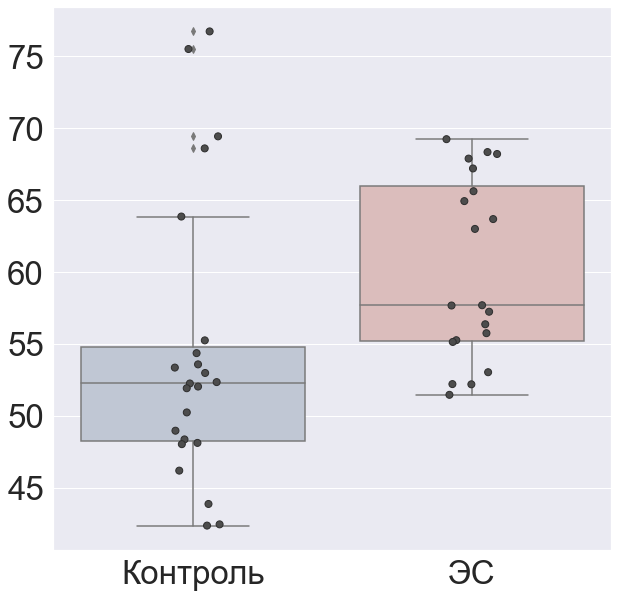

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10)) # меняет размер графика
sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set(font_scale=3)
sns.boxplot(data = all_glt_num, palette="vlag")
sns.stripplot(data=all_glt_num,
              size=7, color=".3", linewidth=1, jitter = True) #добавляет "горошки"


Посчитаем медиану, 25 и 75 процентили

In [10]:
procentile_num_clusters = all_glt_num.quantile([0.25, 0.50 , 0.75])
print(procentile_num_clusters)

       Контроль         ЭС
0.25  48.234976  55.226980
0.50  52.248112  57.680097
0.75  54.802133  66.016004


Проверим отличается ли статистически достоверно количество кластеров после ЭС в сравнении с контролем, применив непараметрический критерий Манна-Уитни

In [11]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(all_glt_num.iloc[:, 0].dropna(), all_glt_num.iloc[:, 1].dropna())
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=120.000, p=0.008


Шаг4. Рассчет параметров объема кластеров GLT-1
Рассчитаем медиану, процентили для объема кластеров GLT-1. 
Сначала загрузим в один столбец все имеющиеся значения объема кластеров для каждого животного c помощью функции one_col_stack

In [12]:
vol_glt_ctrl = pd.concat([N1_gs_glt_ctrl.iloc[:,::2],N2_gs_glt_ctrl.iloc[:,::2], N3_gs_glt_ctrl.iloc[:,::2], N4_gs_glt_ctrl.iloc[:,::2], N5_gs_glt_ctrl.iloc[:,::2]], axis=1, ignore_index=True)
vol_glt_SE = pd.concat([N1_gs_glt_SE.iloc[:,::2],N2_gs_glt_SE.iloc[:,::2], N3_gs_glt_SE.iloc[:,::2], N4_gs_glt_SE.iloc[:,::2], N5_gs_glt_SE.iloc[:,::2], N6_gs_glt_SE.iloc[:,::2]], axis=1, ignore_index=True)


def one_col_stack (dataset):
    df = pd.DataFrame()
    for i in range(dataset.shape[1]):
        df = pd.concat([df, pd.Series(dataset.iloc[:,i].values)],axis=0)
    return(df)

vol_glt_ctrl= one_col_stack (vol_glt_ctrl)
vol_glt_SE = one_col_stack (vol_glt_SE)

vol_glt_ctrl.reset_index(inplace=True, drop=True)
vol_glt_SE.reset_index(inplace=True, drop=True)

all_vol_glt = pd.DataFrame()

all_vol_glt = vol_glt_ctrl.copy()
all_vol_glt = all_vol_glt.join(vol_glt_SE, how='outer',lsuffix = '_CTRL', rsuffix= '_SE')
all_vol_glt.rename(columns = {'0_CTRL' : 'Контроль', '0_SE' : 'ЭС'}, inplace = True)
#all_vol_glt.dropna(inplace=True)



In [13]:
#all_vol_glt.sort_values( ['Контроль','ЭС'], ascending=True, inplace= True)

In [14]:
procentile_vol_clusters = all_vol_glt.quantile([0.25, 0.50 , 0.75])
print(procentile_vol_clusters)

      Контроль     ЭС
0.25    0.2256  0.213
0.50    0.3795  0.362
0.75    0.5872  0.562


Посмотрим плотность распределения

<AxesSubplot:xlabel='ЭС', ylabel='Probability'>

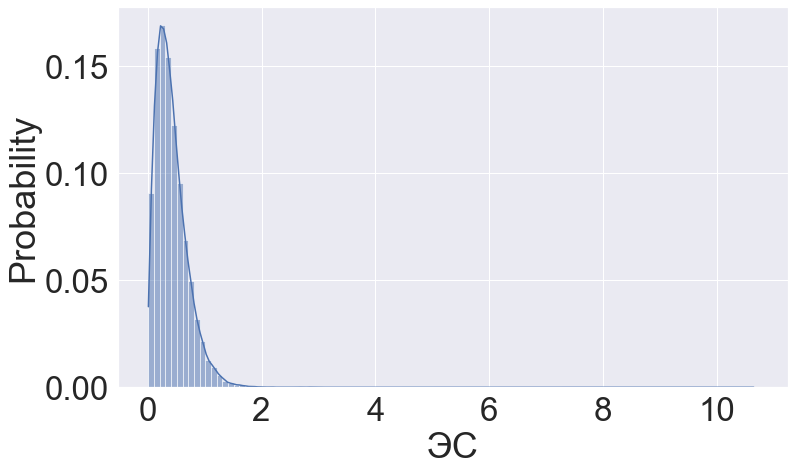

In [56]:
plt.figure(figsize=(12, 7))
sns.histplot(all_vol_glt.iloc[:, 1],kde = True, stat='probability', binwidth= 0.1, bins = 50)

<Figure size 864x504 with 0 Axes>

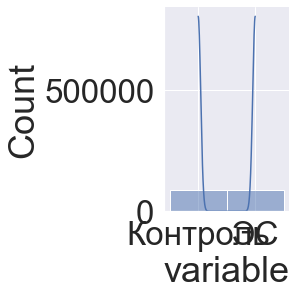

In [66]:

with sns.plotting_context(font_scale=3), sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 7)) # меняет размер графика
    sns.set_style("whitegrid")
    sns.set_theme(style="ticks")
    sns.set(font_scale=3)
#test = all_vol_glt['Контроль']
#sns.histplot(all_vol_glt1,color='red')#,kde=True, multiple="stack", binwidth = 0.1)#, binwidth = 0.1 )#)
#sns.boxplot(data = all_vol_glt, palette="vlag")
#sns.histplot(all_vol_glt.iloc[:, 1],kde = True, stat='probability', binwidth= 0.1, bins = 50)
#sns.pairplot(pd.melt(all_vol_glt), vars = ['Контроль', 'ЭС'], dropna = True)
#sns.histplot(all_vol_glt2,color='red')#.info(memory_usage='deep')


#N1_vf_ctrl  ['Контроль'] = N1_gs_glt_ctrl.sum().iloc[::2] # voluma fraction

In [16]:
#sns.pairplot(all_glt_num2)